In [0]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [305]:
!pip install sqlalchemy

In [306]:
cd ./drive/My\ Drive/01.data

[Errno 2] No such file or directory: './drive/My Drive/01.data'
/content/drive/My Drive/01.data


#◈ Google Drive 접근해서 데이터프레임형식으로 파일 가져오기

In [0]:
steam = pd.read_csv('./steam.csv')

In [308]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [0]:
b= steam.drop(4)

In [310]:
b.index

Int64Index([    0,     1,     2,     3,     5,     6,     7,     8,     9,
               10,
            ...
            27065, 27066, 27067, 27068, 27069, 27070, 27071, 27072, 27073,
            27074],
           dtype='int64', length=27074)

In [311]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [312]:
steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


##결측치 검색

- 'name'의 중복 값을 찾음

In [313]:
steam.describe(include='all')

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
count,2.707500e+04,27075,27075,27075.000000,27075,27075,27075,27075.000000,27075,27075,27075,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075,27075.000000
unique,NaN,27033,2619,NaN,17113,14354,7,NaN,3333,1552,6423,NaN,NaN,NaN,NaN,NaN,13,NaN
top,NaN,Dark Matter,2018-07-13,NaN,Choice of Games,Big Fish Games,windows,NaN,Single-player,Action;Indie,Action;Indie;Casual,NaN,NaN,NaN,NaN,NaN,0-20000,NaN
freq,NaN,3,64,NaN,94,212,18398,NaN,6110,1852,845,NaN,NaN,NaN,NaN,NaN,18596,NaN
mean,5.962035e+05,NaN,NaN,0.981127,NaN,NaN,NaN,0.354903,NaN,NaN,NaN,45.248864,1.000559e+03,211.027147,149.804949,146.05603,NaN,6.078193
std,2.508942e+05,NaN,NaN,0.136081,NaN,NaN,NaN,2.406044,NaN,NaN,NaN,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,NaN,7.874922
min,1.000000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.00000,NaN,0.000000
25%,4.012300e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,6.000000e+00,2.000000,0.000000,0.00000,NaN,1.690000
50%,5.990700e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,7.000000,2.400000e+01,9.000000,0.000000,0.00000,NaN,3.990000
75%,7.987600e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,23.000000,1.260000e+02,42.000000,0.000000,0.00000,NaN,7.190000


In [314]:
steam['name'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27070    False
27071    False
27072    False
27073    False
27074    False
Name: name, Length: 27075, dtype: bool

- 중복된값을 drop 시킴

In [0]:
steam['name']=steam['name'].drop_duplicates(keep='first')

- 결측값이 있는지 확인

In [316]:
steam.isnull().sum()

appid                0
name                42
release_date         0
english              0
developer            0
publisher            0
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

- 결측값 삭제

In [0]:
steam = steam.dropna()

In [318]:
steam.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [319]:
steam

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


#◈ 기존 데이터로 새로운 데이터 생성

In [0]:
evaluation = steam[['appid','name','positive_ratings','negative_ratings','owners','average_playtime']]

- 부정적인 의견이 100개 보다 큰값만 추출

In [321]:
evaluation.describe(include='all')
#mean positive_ratings -> 1,002.061 , median =25 
#mean nagative_ratings -> 211.330855 , median = 9

,appid,name,positive_ratings,negative_ratings,owners,average_playtime
count,2.703300e+04,27033,2.703300e+04,27033.000000,27033,27033.000000
unique,NaN,27033,NaN,NaN,13,NaN
top,NaN,Jay Walker,NaN,NaN,0-20000,NaN
freq,NaN,1,NaN,NaN,18558,NaN
mean,5.959125e+05,NaN,1.002061e+03,211.330855,NaN,150.028928
std,2.508890e+05,NaN,1.900343e+04,4288.258911,NaN,1828.447539
min,1.000000e+01,NaN,0.000000e+00,0.000000,NaN,0.000000
25%,4.008000e+05,NaN,6.000000e+00,2.000000,NaN,0.000000
50%,5.986800e+05,NaN,2.500000e+01,9.000000,NaN,0.000000
75%,7.984200e+05,NaN,1.260000e+02,42.000000,NaN,0.000000


In [322]:
evaluation.median()

appid               598680.0
positive_ratings        25.0
negative_ratings         9.0
average_playtime         0.0
dtype: float64

In [0]:
eva_mask=evaluation[evaluation['negative_ratings']>200]

In [324]:
eva_mask

,appid,name,positive_ratings,negative_ratings,owners,average_playtime
0,10,Counter-Strike,124534,3339,10000000-20000000,17612
1,20,Team Fortress Classic,3318,633,5000000-10000000,277
2,30,Day of Defeat,3416,398,5000000-10000000,187
3,40,Deathmatch Classic,1273,267,5000000-10000000,258
4,50,Half-Life: Opposing Force,5250,288,5000000-10000000,624
...,...,...,...,...,...,...
25950,994280,古剑奇谭三(Gujian3),4945,1035,100000-200000,614
26287,1011230,高考工厂模拟(Crazy School Simulator),128,351,50000-100000,0
26500,1021950,When the Darkness comes,2966,301,100000-200000,0
26569,1025580,Vainglory,1211,739,200000-500000,0


In [325]:
eva_mask.describe(include='all')

,appid,name,positive_ratings,negative_ratings,owners,average_playtime
count,2.584000e+03,2584,2.584000e+03,2584.000000,2584,2584.000000
unique,NaN,2584,NaN,NaN,13,NaN
top,NaN,Torchlight,NaN,NaN,200000-500000,NaN
freq,NaN,1,NaN,NaN,757,NaN
mean,3.491716e+05,NaN,9.521978e+03,1996.096362,NaN,916.619582
std,2.053527e+05,NaN,6.081321e+04,13744.558066,NaN,3462.372243
min,1.000000e+01,NaN,3.800000e+01,201.000000,NaN,0.000000
25%,2.341775e+05,NaN,8.007500e+02,298.000000,NaN,77.000000
50%,3.239650e+05,NaN,2.074000e+03,508.500000,NaN,239.000000
75%,4.588825e+05,NaN,5.731250e+03,1186.500000,NaN,644.250000


- 긍정적인 리뷰의 비율

In [0]:
eva_mask_postive_percent=eva_mask['positive_ratings'][:]/ (eva_mask['positive_ratings'][:] + eva_mask['negative_ratings'][:]) *100

- 부정적인 리뷰의 비율

In [327]:
eva_mask_nagative_percent=eva_mask['negative_ratings'][:]/ (eva_mask['positive_ratings'][:] + eva_mask['negative_ratings'][:]) *100
eva_mask_nagative_percent

0         2.611185
1        16.021260
2        10.435239
3        17.337662
4         5.200433
           ...    
25950    17.307692
26287    73.277662
26500     9.213346
26569    37.897436
26875    48.892989
Length: 2584, dtype: float64

## 데이터프레임 이어붙이기

In [0]:
new_eva_mask = pd.DataFrame(eva_mask)

In [0]:
new_eva_mask['postive_percent']=eva_mask_postive_percent

In [330]:
new_eva_mask

,appid,name,positive_ratings,negative_ratings,owners,average_playtime,postive_percent
0,10,Counter-Strike,124534,3339,10000000-20000000,17612,97.388815
1,20,Team Fortress Classic,3318,633,5000000-10000000,277,83.978740
2,30,Day of Defeat,3416,398,5000000-10000000,187,89.564761
3,40,Deathmatch Classic,1273,267,5000000-10000000,258,82.662338
4,50,Half-Life: Opposing Force,5250,288,5000000-10000000,624,94.799567
...,...,...,...,...,...,...,...
25950,994280,古剑奇谭三(Gujian3),4945,1035,100000-200000,614,82.692308
26287,1011230,高考工厂模拟(Crazy School Simulator),128,351,50000-100000,0,26.722338
26500,1021950,When the Darkness comes,2966,301,100000-200000,0,90.786654
26569,1025580,Vainglory,1211,739,200000-500000,0,62.102564


In [331]:
new_eva_mask['negative_percent'] = eva_mask_nagative_percent
new_eva_mask

,appid,name,positive_ratings,negative_ratings,owners,average_playtime,postive_percent,negative_percent
0,10,Counter-Strike,124534,3339,10000000-20000000,17612,97.388815,2.611185
1,20,Team Fortress Classic,3318,633,5000000-10000000,277,83.978740,16.021260
2,30,Day of Defeat,3416,398,5000000-10000000,187,89.564761,10.435239
3,40,Deathmatch Classic,1273,267,5000000-10000000,258,82.662338,17.337662
4,50,Half-Life: Opposing Force,5250,288,5000000-10000000,624,94.799567,5.200433
...,...,...,...,...,...,...,...,...
25950,994280,古剑奇谭三(Gujian3),4945,1035,100000-200000,614,82.692308,17.307692
26287,1011230,高考工厂模拟(Crazy School Simulator),128,351,50000-100000,0,26.722338,73.277662
26500,1021950,When the Darkness comes,2966,301,100000-200000,0,90.786654,9.213346
26569,1025580,Vainglory,1211,739,200000-500000,0,62.102564,37.897436


## positve_percent 값으로 범위를 지정해서 리뷰를 텍스트로 추출


In [0]:
txt_review =[]
for i in new_eva_mask['postive_percent']:
  if i >=80:
    txt_review+=['Very Positive']
  elif i>=70:
    txt_review+=['Mostly Positive']
  elif i>=40:
    txt_review+=['Mixed']
  elif i>=20:
    txt_review+=['Mostly Negative']
  else:
    txt_review+=['Very Nagative']

In [333]:
inx = new_eva_mask.index
inx

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25227, 25343, 25478, 25892, 25902, 25950, 26287, 26500, 26569,
            26875],
           dtype='int64', length=2584)

In [334]:
txt_review = pd.Series(txt_review,index=inx)
txt_review

0          Very Positive
1          Very Positive
2          Very Positive
3          Very Positive
4          Very Positive
              ...       
25950      Very Positive
26287    Mostly Negative
26500      Very Positive
26569              Mixed
26875              Mixed
Length: 2584, dtype: object

In [0]:
new_eva_mask['review'] = txt_review #행에붙이기

In [336]:
new_eva_mask

,appid,name,positive_ratings,negative_ratings,owners,average_playtime,postive_percent,negative_percent,review
0,10,Counter-Strike,124534,3339,10000000-20000000,17612,97.388815,2.611185,Very Positive
1,20,Team Fortress Classic,3318,633,5000000-10000000,277,83.978740,16.021260,Very Positive
2,30,Day of Defeat,3416,398,5000000-10000000,187,89.564761,10.435239,Very Positive
3,40,Deathmatch Classic,1273,267,5000000-10000000,258,82.662338,17.337662,Very Positive
4,50,Half-Life: Opposing Force,5250,288,5000000-10000000,624,94.799567,5.200433,Very Positive
...,...,...,...,...,...,...,...,...,...
25950,994280,古剑奇谭三(Gujian3),4945,1035,100000-200000,614,82.692308,17.307692,Very Positive
26287,1011230,高考工厂模拟(Crazy School Simulator),128,351,50000-100000,0,26.722338,73.277662,Mostly Negative
26500,1021950,When the Darkness comes,2966,301,100000-200000,0,90.786654,9.213346,Very Positive
26569,1025580,Vainglory,1211,739,200000-500000,0,62.102564,37.897436,Mixed


#◈ 시각화

In [0]:
standard=new_eva_mask['average_playtime'].describe().median()

In [0]:
b=new_eva_mask[new_eva_mask['review']=='Very Positive']
c=new_eva_mask[new_eva_mask['review']=='Mostly Positive']

In [0]:
x=new_eva_mask['postive_percent'][0:15]
y=new_eva_mask['name'][0:15]
x1=new_eva_mask['negative_percent'][0:15]

In [342]:
b['average_playtime'].max()

63481

In [386]:
b_rank = b['postive_percent'].rank(ascending =False)
b_rank_sort = b_rank.sort_values() # 순서대로

23      1.0
7577    2.0
2290    3.0
7509    4.0
7399    5.0
Name: postive_percent, dtype: float64

In [417]:
po_ne = b['postive_percent'] - b['negative_percent']
po_ne=po_ne.rank(ascending=False)


0          18.0
1         834.0
2         453.0
3         939.0
4         123.0
          ...  
25478     601.0
25892     561.0
25902    1075.0
25950     937.0
26500     368.0
Length: 1091, dtype: float64

In [418]:
po_ne.sort_values()

23         1.0
7577       2.0
2290       3.0
7509       4.0
7399       5.0
         ...  
1101    1087.0
4221    1088.0
1683    1089.0
516     1090.0
1448    1091.0
Length: 1091, dtype: float64

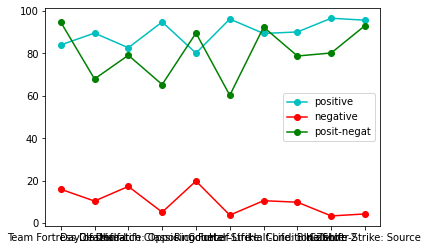

In [411]:
plt.plot(b['name'][b_rank_sort[0:10]],b['postive_percent'][b_rank_sort[0:10]],'-co',label='positive')# 
plt.plot(b['name'][b_rank_sort[0:10]],b['negative_percent'][b_rank_sort[0:10]],'-ro',label='negative')
plt.plot(b['name'][b_rank_sort[0:10]],po_ne[:][0:10],'-go',label='posit-negat')

plt.legend()
plt.show()

In [412]:
po_ne[:][0:10]

0    94.777631
1    67.957479
2    79.129523
3    65.324675
4    89.599133
5    60.255665
6    92.375671
7    78.774246
8    80.198020
9    93.120121
dtype: float64